# Introduction to regression with neural networks in tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combinations of variables, even shorter... predicting a number.

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.0


### Creating a data to view and fit

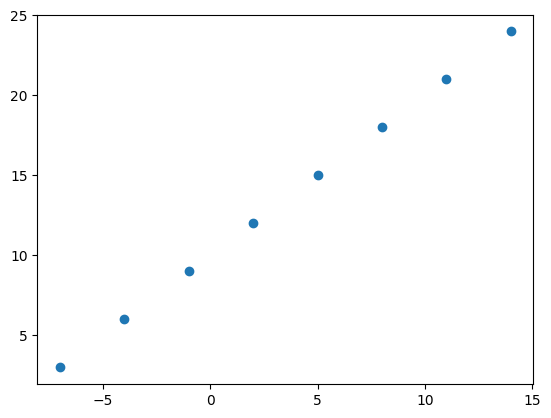

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
## Relationship
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for housing price prediction
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

### Steps in modelling with tensorflow
1. **Creating a model**: define the input and output layers,
as well as the hidden layers of the deep learning model

2. **Compile the model**: define loss function, optimizer and evaluation metrics

3. **Fit the model**: adjust the weights of the model to fit the training data


In [ ]:
# Set random seed
tf.random.set_seed(30)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer="sgd", metrics=["mae"]) # SGD = schocastic gradient descent

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 12.3342 - mae: 12.3342
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.2017 - mae: 12.2017
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.0692 - mae: 12.0692
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.9367 - mae: 11.9367
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.8042 - mae: 11.8042


In [ ]:
y_pred = model.predict(X)
y_pred[0], X[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


(array([-3.5065463], dtype=float32),
 <tf.Tensor: shape=(), dtype=float32, numpy=-7.0>)

### Improving the model

We can improve the model by altering the steps we took to create the model:
1. **Creating a model** : adding more layers, increasing the number of neurons in each layer or changing the activation function of each layer.

2. **Compiling a model** : here we might change the optimization function or **learning rate** of optimization function.

3. **Fitting the model** : here we might fit a model for more **epochs**



In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss='mae',
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step - loss: 16.3434 - mae: 16.3434
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 15.3720 - mae: 15.3720
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 14.5272 - mae: 14.5272
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.8753 - mae: 13.8753
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.2383 - mae: 13.2383
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12.6111 - mae: 12.6111
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.9906 - mae: 11.9906
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.3740 - mae: 11.3740
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.7585 - mae: 10.7585
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.1415 - mae: 10.1415
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.5202 - mae: 9.5202
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.8916 - mae: 8.8916
Epoch 13/100
1/1 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


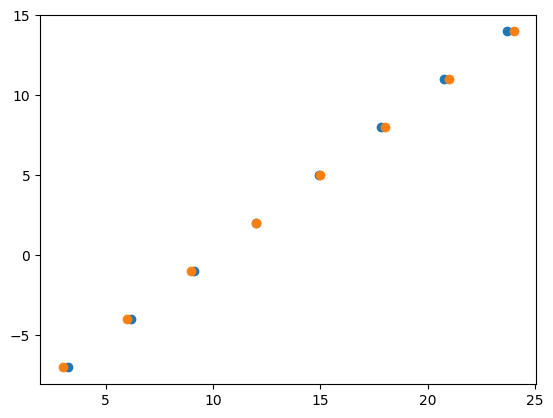

In [ ]:
y_pred = model.predict(X)
plt.scatter(y_pred, X)
plt.scatter(y, X)

### Evaluating a model

In practical a typical workflow you'll go through when building a
neural network is:

```
Build a model -> fit it -> evaluate it -> tweak the model ->
fit it -> evaluate it ...
```

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make the labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

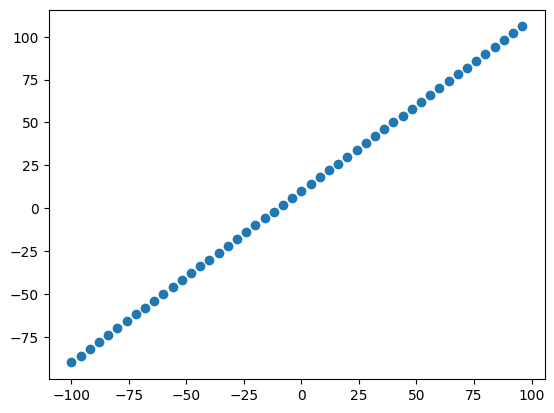

In [ ]:
# Visualize the data
plt.scatter(X, y)

In [ ]:
len(X)

50

In [ ]:
# Splitting the data into train and test set
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test)

(40, 10)

### Visualizing the data
Now we've got our training and test sets... Let's visualize it.

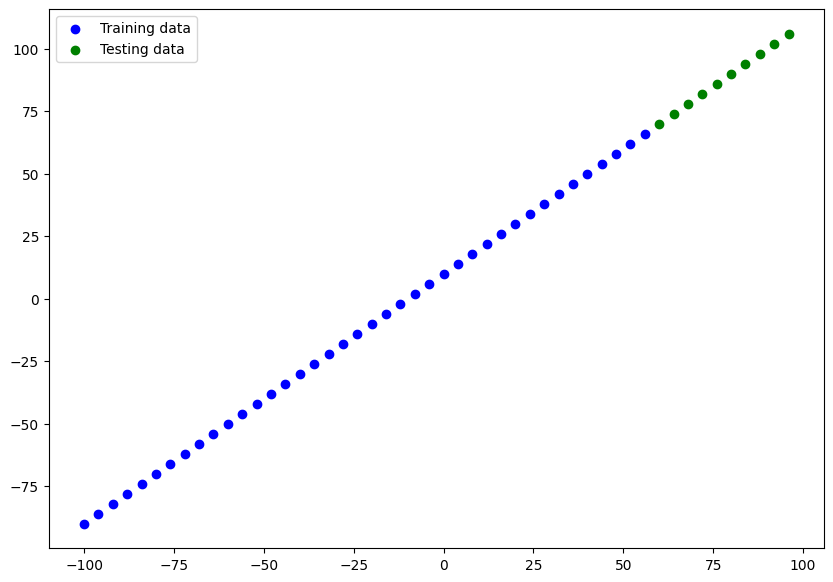

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show the legend
plt.legend()

In [ ]:
# Let's have a look on how to build a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

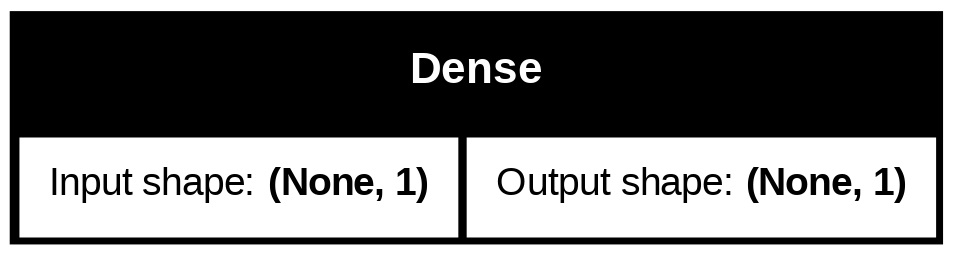

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### Visualizing our model's prediction

In [ ]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [ ]:
# Let's create a plotting function
def plot_pred(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, prediction=y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, c="b", label="Training data")
  plt.scatter(test_data, test_label, c="g", label="Testing data")
  plt.scatter(test_data, prediction, c="r", label="Predictions")
  plt.legend()

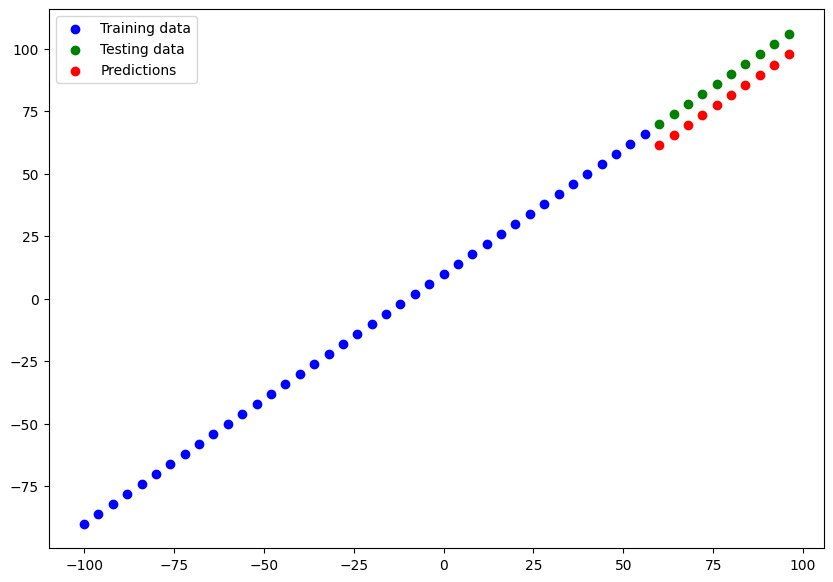

In [ ]:
plot_pred()

### Evaluating our model's predictions using regression evaluation metrics.

Two of the main regression evaluation metrics are:
1. **MAE** : Mean Absolute Error
2. **MSE** : Mean Squared Error

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 8.3501 - mae: 8.3501


[8.350101470947266, 8.350101470947266]

In [ ]:
y_pred = tf.constant(y_pred)
# Calculate the MSE
mae = tf.keras.losses.mae(y_test, tf.squeeze(y_pred))
mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred))
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=8.350101>,
 <tf.Tensor: shape=(), dtype=float32, numpy=69.72617>)

### Running experiments to improve our model
```
Build a model -> fit it -> evaluate it -> tweak the model ->
fit it -> evaluate it ...
```

1. Get more data to train the model.
2. Make your model larger (using a more complex model).
3. Train for bigger epochs.

Let's do 3 modelling experiments

1. `model_1` - same as original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

### Build `model_1`

In [ ]:
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss='mae', optimizer='sgd', metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


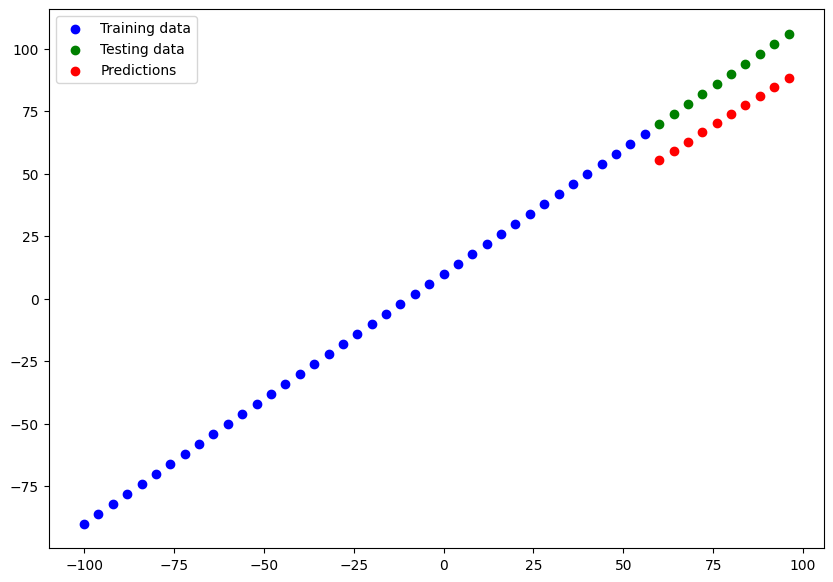

In [ ]:
# Make and plot predictions on model_1
y_pred_1 = model_1.predict(X_test)

plot_pred(prediction=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = tf.keras.losses.mae(y_test, tf.squeeze(y_pred_1))
mse_1 = tf.keras.losses.mse(y_test, tf.squeeze(y_pred_1))
mae_1.numpy(), mse_1.numpy()

(16.05994, 259.1353)

### Build `model_2`

In [ ]:
tf.random.set_seed(30)

# 1. Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, optimizer='sgd', metrics=['mae'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


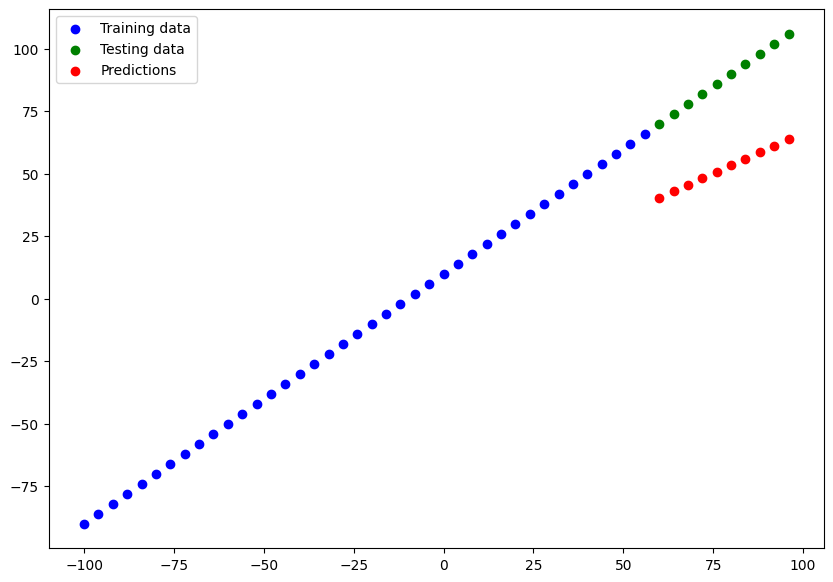

In [ ]:
# Make and plot predictions on model_2
y_pred_2 = model_2.predict(X_test)

plot_pred(prediction=y_pred_2)

In [ ]:
# Calculate model_1 evaluation metrics
mae_2 = tf.keras.losses.mae(y_test, tf.squeeze(y_pred_2))
mse_2 = tf.keras.losses.mse(y_test, tf.squeeze(y_pred_2))
mae_2.numpy(), mse_2.numpy()

(35.863564, 1302.6165)

In [ ]:
### Build `model_3`
tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss='mae', optimizer='sgd', metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


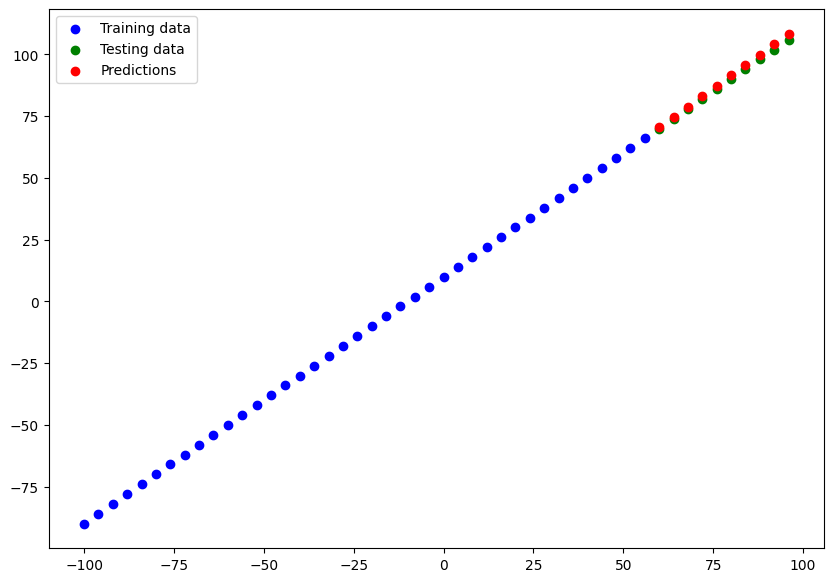

In [ ]:
# Make and plot predictions on model_3
y_pred_3 = model_3.predict(X_test)

plot_pred(prediction=y_pred_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = tf.keras.losses.mae(y_test, tf.squeeze(y_pred_3))
mse_3 = tf.keras.losses.mse(y_test, tf.squeeze(y_pred_3))
mae_3.numpy(), mse_3.numpy()

(1.4275444, 2.4101996)

In [ ]:
### Comparing thr results of our experiments

In [ ]:
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
               ["model_2", mae_2.numpy(), mse_2.numpy()],
               ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,16.059940,259.135315
1,model_2,35.863564,1302.616455
2,model_3,1.427544,2.410200


### `model_2` performed the best
> **NOTE** :  One of the main goal should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.

### Tracking you experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource :** As you build more models, you'll want to look into using:

* **TensorBoard** - a component of tensorFlow library to help track modelling experiments.

* **Weights & biases** - a tool for tracking all kind of ML experiments (plugs straight into tensorboard).

### Saving our model

Saving our models allows us to use them outside of google colab (or wherever they were trained) such as in web applications or mobile apps.

There are two main formats we can save our model:
1. SavedModel format
2. HDF5 format

In [ ]:
# Save the model using the HDF5 format
model_2.save("best_model.h5")

### Loading the saved model

In [ ]:
# Load in the HDF5 format model
loaded_model = tf.keras.models.load_model("best_model.h5")
loaded_model.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_model_preds = loaded_model.predict(X_test)

model_2_preds == loaded_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.shape

(1338, 7)

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Check the result of the model on the test data
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6189.6035 - mae: 6189.6035  


[5982.45166015625, 5982.45166015625]

### Right now our model isn't performing too well, let's try to improve it

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more neurons
2. Save as above but Train for longer

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4943.4126 - mae: 4943.4126  


[4799.75244140625, 4799.75244140625]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

history = model_3.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3211.0288 - mae: 3211.0288  


[3161.975341796875, 3161.975341796875]

Text(0.5, 0, 'epochs')

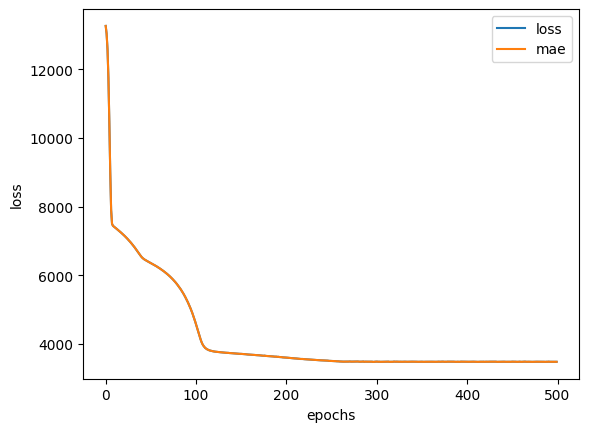

In [ ]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

###🤔 How long should you train for??

It depends. Really... it depends on the problem you are working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the **Early Stopping callback**

### Preprocessing Data (Normalization and Standardization)
In terms of scaling values, neural networks tends to prefer normalization.

If you are note sure which to use, you could try both and see which performs better.


### Let's start it fresh

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create our X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform our training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
X_train_normal[0]

array([0.76086957, 0.28625235, 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Build the neural network model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae", optimizer="adam", metrics=["mae"])

history = model.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3409.1160 - mae: 3409.1160  


[3346.956298828125, 3346.956298828125]

Text(0.5, 0, 'epochs')

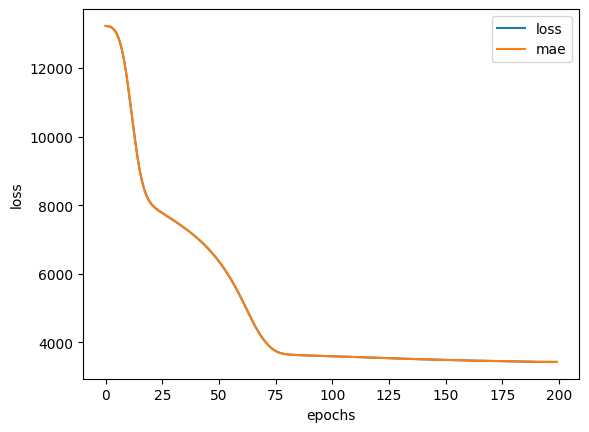

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")